# Lab Assignment Three: Extending Logistic Regression

### Luis Garduno
## 1. Data Overview

###  1.1 Business Understanding

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u><code>About League of Legends:</code></u>
    
   Developed by Riot Studios, League of Legends, or "LoL", is an online multiplayer video-game that is available to Windows/MacOS users. LoL consists 2 teams ('Blue &amp; 'Red') facing each other, where the main objective is to destroy the opposing teams 'Nexus', or home base, while facing obstacles like destroying damage dealing towers &amp; eliminating players throughout the way. Perks &amp; gold are able to be obtained by players/teams through completing tasks such as eliminating players, enemy creeps, or dragons. Players then spend the gold to purchase items that help raise the power of their abilities.
    
   League of Legends offers different game modes, such as ranked. In this game mode, players are given a rank based off of the number of wins + the number of games played. "Diamond" is one of the highest ranks a player may obtain and is known to be extremely competitive. A ranked game on average lasts 30-45 minutes. The dataset we will be using contains the first 10 minute analytics of each team for different diamond ranked matches. 
    
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u><code>Measure of Success</code></u>
    
   Once the data is analyzed, third parties, or teams/players, would be able to conceptualize the level of priority different attributes have during early stages of diamond ranked matches. With the first 10-minutes of each game being critical, they could then use this information to adjust their strategy to one proven to win matches. In order for this data to be useful and trusted by third parties in specific situations such as playing at professional level, the data would have to render at least a 70% accuracy. The reason for it being 70% and not any higher is because as mentioned this data only include the first 10 minutes of a game (average full game: 30-45 minutes). We leave a 30% error gap for any changes of pace the winning team might have for the remaining time of the game (~67%).
    
   Additionally, players who are accustomed to playing as the 'jungle' role (a player role that focuses on obtaining objective eliminations within the jungle areas of the map) can use this analyzed data to better understand the impact elite monsters have on winning games.

-------------------------------------
    
Dataset [Kaggle]: __[First 10 minutes of diamond ranked League of Legends matches](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)__

Question Of Interest : As of the first 10 minutes, which team will win?
    
-------------------------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 Data Preparation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2.1 Data Description

In [1]:
import numpy as np
import pandas as pd

# Load in the dataset into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/Datasets/high_diamond_ranked_10min.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

---------------------------------

Printing out the information about the dataframe we are able to see that there are a
total of 9,879 instances, and 39 attributes.

Additionally we are able to see that there are 19 of the same attributes for each
the blue & red team (columns 1-19 are the same as 20-38).

Attributes for each team includes :
- Wards placed & destroyed
- Total number of kills, deaths, & assists
- First Bloods (1st elimination of the game)
- Total : towers destroyed, gold, experience
- Average : level, CS per minute, & gold per minute
- Difference in gold & experience between the teams
- Objective eliminations : elite monsters(dragons, heralds), minions, & jungle minions

Attributes such as total gold, experience, objectives eliminations, towers destroyed, etc.
will be of type integer (int64) because they will always be whole numbers. Attributes involving
averages such as cs per minute, gold per minute, & level, should be the only of double-precision floating-point
format (float64).

The data type for "blueWins" and "first bloods" could be changed to be of type boolean, but because we are wanting to
visualize these attributes later on, optimally it is best to keep these as integer data types. As a result,
the data types presented for each attribute are correct and should not be changed.

Below is a brief description of some of the key attributes.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# describe dataframe
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


| Variable | Description | Type | Range |
| -------- | ----------- | ---- | ----- |
| **blueWins** (target) | whether blue team won or not | Discrete | [0] red team won; [1] blue team won; |
| WardsPlaced / WardsDestroyed | number of total wards placed or destroyed by team | Continuous | [placed] 5 - 250; [destroyed] 0 - 27 |
| FirstBlood | team with the first kill of game | Discrete | [0] did not get first kill; [1] team obtained first kill |
| Kills / Deaths / Assists | total number of kills, deaths, or assists of team | Continuous | [kills] 0 - 22; [deaths] 0 - 22; [assists] 0 - 29 |
| TowersDestroyed | total number of towers destroyed by team | Continuous | 0 - 2 |
| TotalGold | total gold obtained by team | Continuous | 11,000 - 25,000 |
| AvgLevel | average level of all players on team | Continuous | 4.5 - 8.5 |
| TotalExperience | total experience points accumulated by team | Continuous | 10,000 - 24,000 |
| CSPerMin | average creep score per minute | Continuous | 10.0 - 30.0 |
| GoldPerMin | average gold obtained per minute | Continuous | 1,100.0 - 2,000.0 |

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2.2 Normalizing the Dataset

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# --- Encode the Categorical, discrete variables ---
encoders = dict()
categorical_headers = ['blueFirstBlood','redFirstBlood']

label_encoder = LabelEncoder()
df.blueWins = label_encoder.fit_transform(df.blueWins)

encoders['blueFirstBlood'] = LabelEncoder()
df['blueFirstBlood' + '_int'] = encoders['blueFirstBlood'].fit_transform(df['blueFirstBlood'])

encoders['redFirstBlood'] = LabelEncoder()
df['redFirstBlood' + '_int'] = encoders['redFirstBlood'].fit_transform(df['redFirstBlood'])


# --- Scale the Numeric, continuous variables ---
numeric_headers = df.drop(['blueWins','blueFirstBlood','redFirstBlood'], axis=1)

for column in numeric_headers:
    df[column] = df[column].astype(np.float)
    ss = StandardScaler()
    df[column] = ss.fit_transform(df[column].values.reshape(-1, 1))

df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueFirstBlood_int,redFirstBlood_int
0,0.691784,0,0.316996,-0.379275,1,0.935301,-0.046926,1.071495,-0.879231,-0.753226,...,-0.410475,-0.763215,-0.928741,0.367685,-0.256228,-0.013342,-0.928741,0.052293,0.990429,-0.990429
1,0.844625,0,-0.570992,-0.839069,0,-0.393216,-0.387796,-0.404768,-0.879231,-0.753226,...,-0.410475,-0.436980,1.033784,0.068504,1.191254,0.593342,1.033784,0.758619,-1.009663,1.009663
2,0.775808,0,-0.404494,-1.298863,0,0.271042,1.657424,-0.650812,0.719503,1.327623,...,-0.410475,-0.590502,-0.654900,-2.324944,0.483614,0.520436,-0.654900,0.533909,-1.009663,1.009663
3,0.881333,0,1.149484,-0.839069,0,-0.725346,-0.387796,-0.404768,0.719503,-0.753226,...,0.244627,-0.000609,0.805583,-0.430131,0.544350,-0.013863,0.805583,-0.007406,-1.009663,1.009663
4,-2.323029,0,2.925460,0.540312,0,-0.061087,-0.046926,-0.158724,-0.879231,-0.753226,...,0.244627,0.293085,0.349182,1.564408,0.415133,-0.137283,0.349182,0.613731,-1.009663,1.009663




---------------

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2.3 Data Quality

Using the `missingno` package, we are able to additionally confirm that all the data is complete
and there is no missing entries with the dataset. If there was missing data, we could impute the
missing values by using the k-nearest neighbor. But if an instance was missing a majority of its
attributes, it would be removed from the dataset.

The number of unique values in the column "gameId" is printed to verify that all instances
are weighted equally.

Number of unique values in column "gameId" :  9879
Duplicates :  0


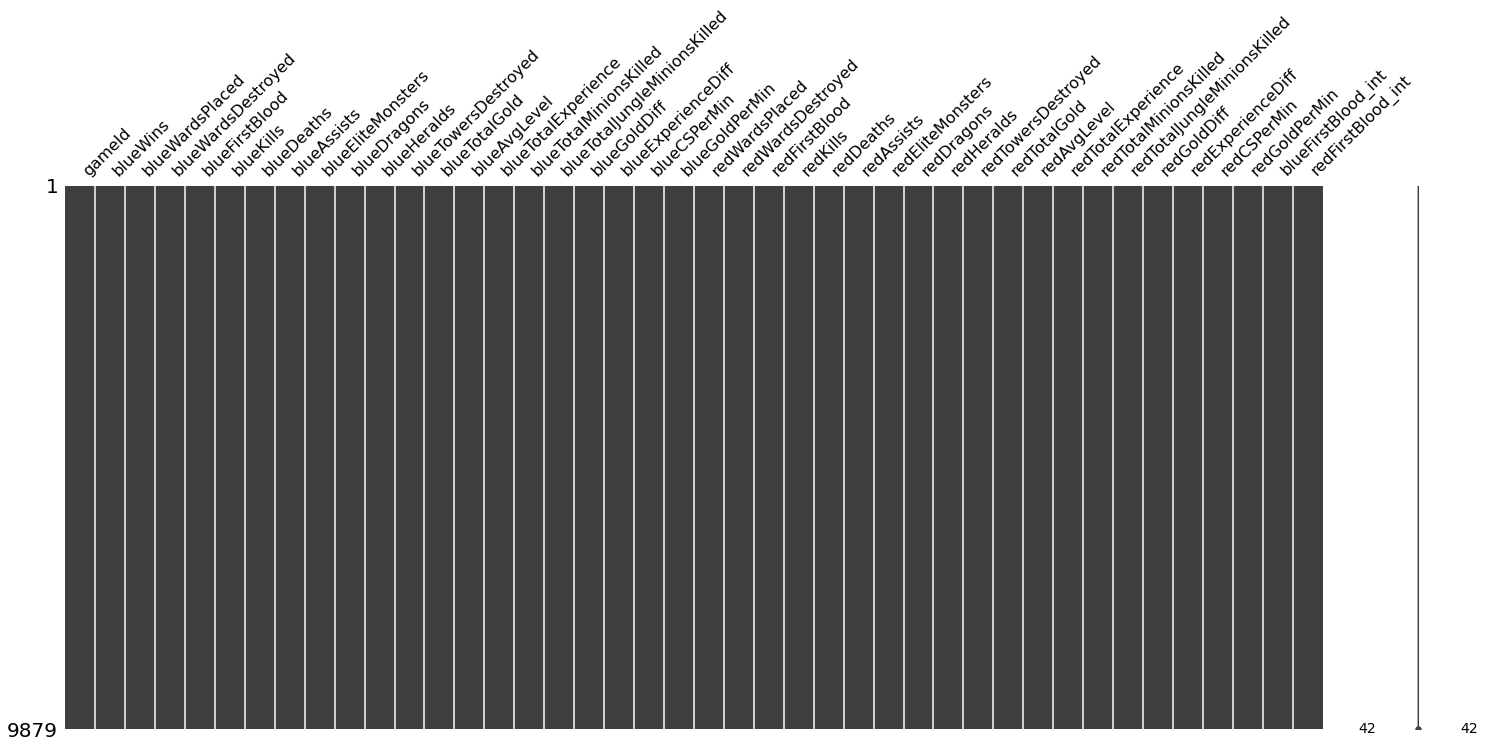

In [4]:
import missingno as mn

mn.matrix(df)

# Count unique values in column 'gameId' of the dataframe
print('Number of unique values in column "gameId" : ', df['gameId'].nunique())

dup_df = df.replace(to_replace=-1,value=np.nan)

dup_df = dup_df.duplicated()
print('Duplicates : ', len(df[dup_df]))


------------------------------

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2.4 Cleaning the Dataset

After confirming there are no duplicates in the data, the "gameId" column can be removed since it
will have no impact on the results.

Using the correlation feature from the `pandas` package, for each team we find the names of
attributes that correlate most with winning (correlation >= 7%). The names of these attributes
are stored in a array for later use.

Lastly, two dataframes are created to hold the attributes at instances when blue team wins, and
when blue team loses.

In [5]:
del df['gameId']

red_col = df.corr()[df.corr()['blueWins'] <= -0.07].index.values
blue_col = df.corr()[df.corr()['blueWins'] >= 0.07].index.values

# Create dataframes for the 2 possible outcomes :
df_win  = df[df["blueWins"]==1]     # Blue Team Win  /  Red Team Lost
df_lose = df[df["blueWins"]==0]     # Red Team Win   /  Blue Team Lost


-------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.3 Creating Training & Test Data
Using Scikit-learn's 
<a href="https://scikit-learn.org/stable/modules/cross_validation.html" target="_top"><b>cross-validation modules</b></a>
we are able to split our dataset for training and testing purposes. 

In [6]:
from sklearn.model_selection import train_test_split

# Create X data & y target dataframe's
if 'blueWins' in df:
    y = df['blueWins'].values
    del df['blueWins']
    X = df.to_numpy()


# Divide the data: 80% Training & 20% Testing.  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print("Training Set", "\n   - Data Shape:",X_train.shape,"\n   - Target Shape:",y_train.shape)
print("\nTesting Set","\n   - Data Shape:",X_test.shape ,"\n   - Target Shape:",y_test.shape)

Training Set 
   - Data Shape: (7903, 40) 
   - Target Shape: (7903,)

Testing Set 
   - Data Shape: (1976, 40) 
   - Target Shape: (1976,)


-------------------

We perform a split within our dataset: 80% will be used for training, and 20% for testing. The 80/20 split is appropriate for
the dataset because recall that the end goal is for users to be able to determine the probabilities of them winning their
on-going game, or in other words we will only be predicting the win probability of __ONE__ game.

Additionally if a 90/10 split was applied it would also be appropriate to use as well. With League of Legends being a
strategy based game, our prediction algorithm essentially uses the training data to find which combination of 
objectives/attributes have the biggest impact/correlation withing winning games. These game winning objectives/attributes could
be found quite early on during training, but we need to account that these objectives/attributes can be wrong in certain
instances due to the fact of the dataset only containing attributes for the first 10 minutes. So as the size of the training
set increases, the amount of fine-tunning performed increases, thus rendering a higher accuracy when predicting through the
testing dataset. 


--------------------

## 2. Modeling

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Custom Logistic Regression Classifier

In [7]:
from numpy import ma
from numpy.linalg import pinv
from scipy.special import expit
from scipy.optimize import fmin_bfgs
from sklearn.metrics import accuracy_score

class Custom_LogisticRegression:
    def __init__(self, eta, solver='lbfgs', penalty='l2', C=1, max_iter=100):
        self.eta = eta            # Step Size
        self.solver = solver      # Steepest Descent / Stochastic Gradient Descent / Newton's Method
        self.penalty = penalty    # No Reg / L1 Reg / L2 Reg / Both L1 & L2
        self.C = C                # Adjustable cost 
        self.max_iter = max_iter  # Number of times gradient will updated
        # self.w_                 # weights 
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Custom Logistic Regression Object with coefficients:\n'+ str(self.w_)
        else:
            return 'Untrained Custom Logistic Regression Object'
        
    # return bias term if requested
    @staticmethod
    def _add_bias(X):   
        return np.hstack((np.ones((X.shape[0],1)),X))
    
    # Activation Function
    @staticmethod
    def _sigmoid(theta):
        return expit(theta)
    
    # Regularizes the gradient function according to self.penalty
    def regularize(self,gradient):
        gradient = gradient.reshape(self.w_.shape)
        
        # No Regularization 
        if self.penalty == 'none':
            return gradient;
        
        # L1 Regularization
        if self.penalty == 'l1':
            gradient[1:] += np.sign(self.w_[1:]) * self.C
            return gradient
        
        # L2 Regularization
        if self.penalty == 'l2':
            gradient[1:] += -2 * self.w_[1:] * self.C
            return gradient
        
        # Both L1 & L2 Regularization  
        if self.penalty == 'elasticnet':
            gradient[1:] = (gradient[1:] + (np.sign(self.w_[1:]) * self.C)) + (gradient[1:] + ((-2 * self.w_[1:]) * self.C))
            return gradient
        
    
    def _get_gradient(self,X,y):
        
        # SGD = Stochastic Gradient Descent
        if self.solver == 'SGD': 
            idx = int(np.random.rand()*len(y)) 
            ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
            gradient = X[idx] * ydiff[:,np.newaxis]                  # convert ydiff into column vector & multiply through
            gradient = self.regularize(gradient);
            
            return gradient;
        
        # Hessian = Rank One Hessian Approximation 
        if self.solver == 'Hessian':
            g = self.predict_proba(X,add_bias=False).ravel()  # get sigmoid value for all classes
            hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

            ydiff = y-g 
            gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through 
            gradient = self.regularize(gradient) 
        
            return pinv(hessian) @ gradient
        
    # Returns the probability of y being equal to 1
    def predict_proba(self,X, add_bias=True):
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) 
    
    # Return predicted values
    def predict(self,X):
        return (self.predict_proba(X)>0.5)
    
    def fit(self, X, y):
        Xb = self._add_bias(X)
        n_samples, n_features = Xb.shape
        
        # lbfgs = Least-memory BFGS
        if self.solver == 'lbfgs':
            self.w_ = fmin_bfgs(LBFGS.obj_function,              # Optimization function
                                np.zeros((n_features,1)),        # initialization of np array
                                fprime=LBFGS.obj_gradient,       # gradient function
                                args=(Xb,y,self.C,self.penalty), # Additional args required for gradient/objective function
                                gtol=1e-03,                      # stopping criteria for gradient, |v_k|
                                maxiter=self.max_iter,           
                                disp=False)
            self.w_ = self.w_.reshape((n_features,1))
            
        if self.solver == 'SGD' or self.solver == 'Hessian':
            self.w_ = np.zeros((n_features,1))
            
            for _ in range(self.max_iter):
                gradient = self._get_gradient(Xb,y)
                self.w_ += gradient*self.eta

In [8]:
# LBFGS or Least-memory BFGS (Part of Quasi-Newton Method family)
class LBFGS(Custom_LogisticRegression):
    
    # Activation Function
    @staticmethod
    def obj_function(w,X,y,C,p):
        g = expit(X @ w)
        return -np.sum(ma.log(g[y==1]))-np.sum(ma.log(1-g[y==0])) + C*sum(w**2)

    @staticmethod
    def obj_gradient(w,X,y,C,p):
        ydiff = y - expit(X @ w)
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        
        # To align w/ sklearn conventions, lbfgs only handles L2 or no penalty
        if p == 'none':
            return -gradient;
        if p == 'l2':
            gradient[1:] += -2 * w[1:] * C
            return -gradient


----------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Custom Classifier Training


In [9]:
# Visualize the performance of the classifier using a lolipop plot w/ markers 
def CustomTrainer(custom_LR):
    costs = np.logspace(-5,1,20)
    
    accur = np.zeros((costs.size,1))     # accuracies depending on on each Cost value 
    c_val = np.zeros((costs.size,1))     # stores all cost values
    
    i = 0
    for x in costs:
        custom_LR.C=x                    # Update the cost value 
        c_val[i] = x
        custom_LR.fit(X_train,y_train)   # Fit according to training data
        yhat = custom_LR.predict(X_test) # Predict according to testing data
        accur[i] = np.array(accuracy_score(y_test,yhat))
        i = i + 1
    # Prepare Data
    df_tb = pd.DataFrame({'vals' : accur.reshape(-1)})
    df_tb['c'] = c_val.reshape(-1)
    df_tb['colors'] = 'red'              # Highest Validation Accuracy : Green & Lowest will be Red
    df_tb.loc[df_tb.vals == (np.amax(df_tb.vals)), 'colors'] = 'green'
    # Draw Plot
    fig, ax = plt.subplots(figsize=(15,10), dpi=80)
    ax.vlines(x=df_tb.index, ymin=0, ymax=df_tb.vals,color=df_tb.colors, alpha=0.7, linewidth=4)
    ax.scatter(x=df_tb.index, y=df_tb.vals, s=75,color=df_tb.colors, alpha=0.7)
   
    # Labels, Title, YLimit 
    ax.set_xticks(range(0,len(costs)))
    ax.set_xticklabels(['%.4f'%(ct) for ct in costs], rotation='vertical')
    ax.set_xlabel('C')
    ax.set_ylabel('Validation Accuracy')
    ax.set_title(str(custom_LR.solver) + ' Custom Logistic Regression Trainer')
    ax.set_ylim(0,0.8)
    
    # Annotate
    for row in df_tb.itertuples():
        ax.text(row.Index, row.vals + 0.02, s=round(row.vals,4),
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=10)
    
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.1 Training with Stochastic Gradient Descent (SGD)

In [10]:
%%time
sgd = Custom_LogisticRegression(eta=1, solver='SGD', penalty='l1')
sgd.fit(X_train, y_train)
yhat = sgd.predict(X_test)
print('Accuracy of:', accuracy_score(y_test,yhat))

Accuracy of: 0.7115384615384616
CPU times: user 12.1 ms, sys: 0 ns, total: 12.1 ms
Wall time: 11.5 ms


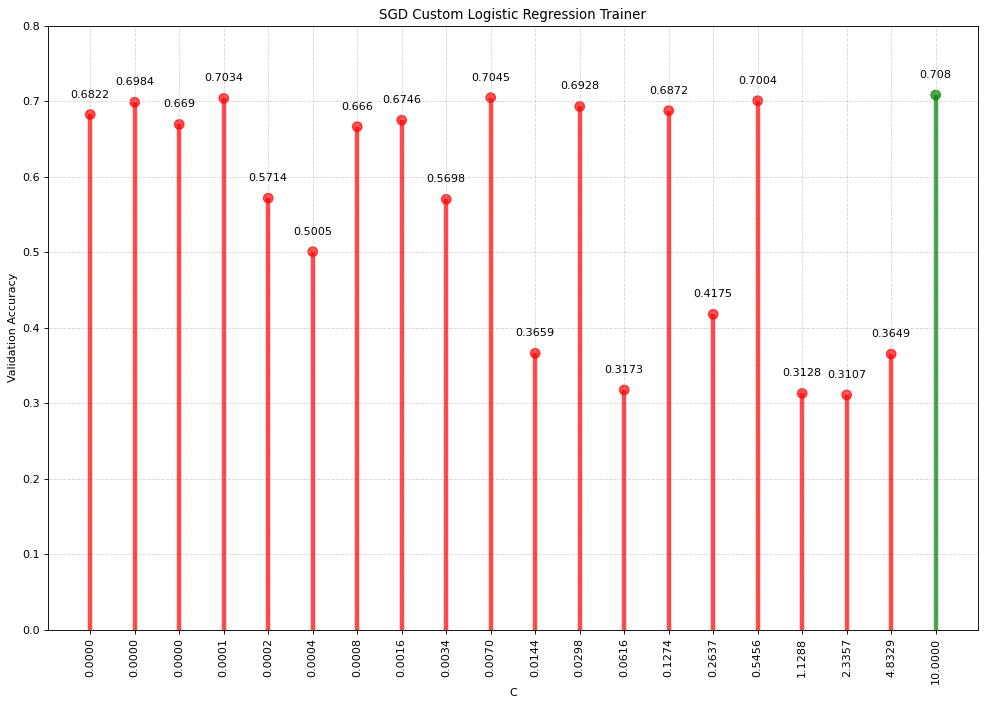

In [11]:
sgd_Custom = Custom_LogisticRegression(eta=1,solver='SGD')
sgd_Trained = CustomTrainer(sgd_Custom)

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.2 Training with Rank-One Hessian (Quasi-Newton Method)

In [12]:
%%time
hessian = Custom_LogisticRegression(eta=2, solver='Hessian', penalty='l1', C=0.1, max_iter=2)
hessian.fit(X_train, y_train)
yhat = hessian.predict(X_test)
print('Accuracy of:', accuracy_score(y_test,yhat))

Accuracy of: 0.7267206477732794
CPU times: user 1.01 s, sys: 246 ms, total: 1.26 s
Wall time: 439 ms


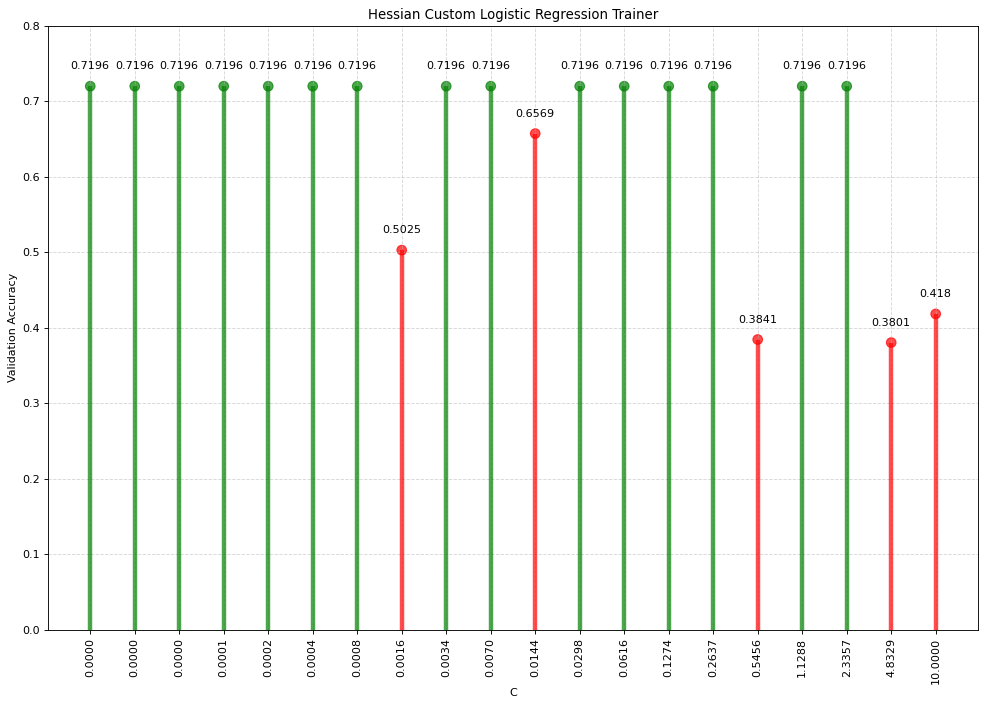

In [13]:
hessian_Custom = Custom_LogisticRegression(eta=1,solver='Hessian', max_iter=20)
hessian_Trained = CustomTrainer(hessian_Custom)

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.3 Training with Least-Memory BFGS (LBFGS) (Quasi-Newton Method)

In [14]:
%%time
lbfgs = Custom_LogisticRegression(eta=1,max_iter=1)
lbfgs.fit(X_train, y_train)
yhat = lbfgs.predict(X_test)
print('Accuracy of:',accuracy_score(y_test,yhat))

Accuracy of: 0.7176113360323887
CPU times: user 17.5 ms, sys: 405 µs, total: 17.9 ms
Wall time: 14.7 ms


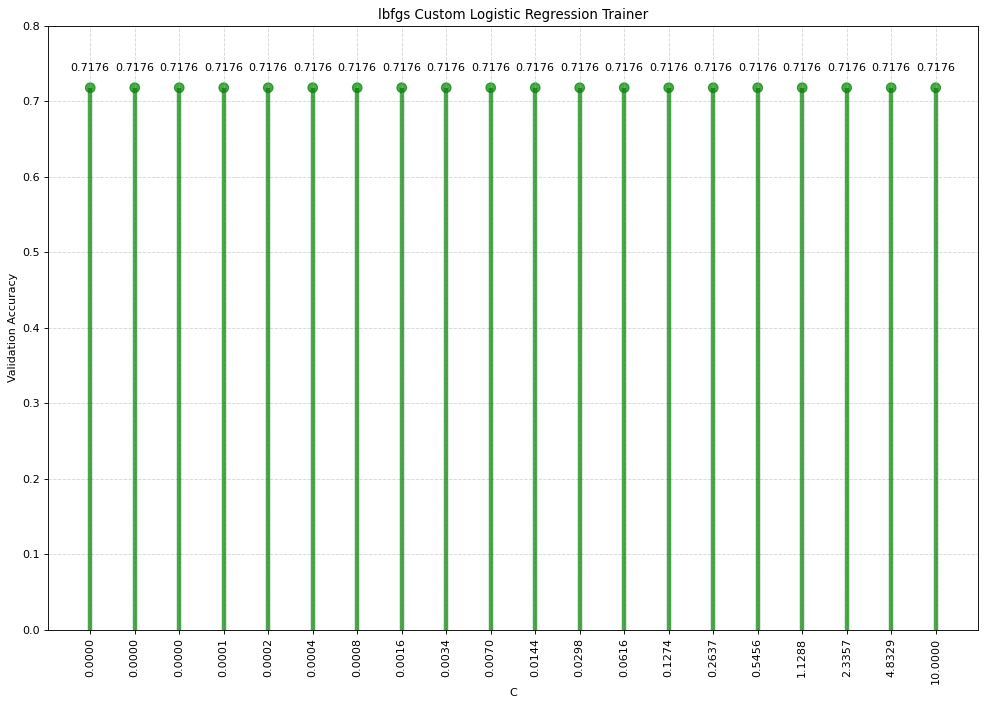

In [15]:
lbfgs_Custom = Custom_LogisticRegression(eta=1, max_iter=1)
CustomTrainer(lbfgs_Custom)

For the 3 custom optimization procedures implemented it is to be noted that 2 instances are created, 1 that outputs the time
and accuracy (v1), and then the other one is used to visualize the performance of various cost values (v2). The biggest
different between them is that "data snooping" was heavily involved with optimizing the parameters for v1. The v2 instance for
the hessian took the largest hit in regards to computation time. This is because for the v2 instances, default parameters were
used (default max iterations for the Lfbgs/Hessian procedures were lowered to avoid compile errors). The LBFGS optimization procedure on the other hand was not affected at all, as confirmed by the lolipop plot. Is it also to be noted that because data snooping was performed in the v1 instances, they performed overall much better than v2 instances in regards to accuracy.   


------------------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Comparing Classifier Performance

Although the hessian optimization technique rendered out the highest validation accuracy of all custom implementations, the time it took to compute this accuracy should be noted. Not too far behind the hessian in regards to accuracy is the Least-memory BFGS (LBFGS) implementation with a difference of ~0.1%. After looking at the LBFGS runtime the best performing procedure is without a doubt a clear winner. It renders in ${\frac{1}{10}}$th of the time the hessian did!

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3.1 Custom LM-BFGS vs. Scikit LM-BFGS

In [16]:
%%time
# Visualize the performance differences in terms of training time and classification performance.
from sklearn.linear_model import LogisticRegression as SK_LogisticRegression

lbfgs_sk = SK_LogisticRegression(max_iter=1) 
lbfgs_sk.fit(X_train,y_train)
yhat = lbfgs_sk.predict(X_test)
print('Accuracy of:',accuracy_score(y_test,yhat))

Accuracy of: 0.7176113360323887
CPU times: user 38.4 ms, sys: 6.74 ms, total: 45.2 ms
Wall time: 234 ms


/home/blurry/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


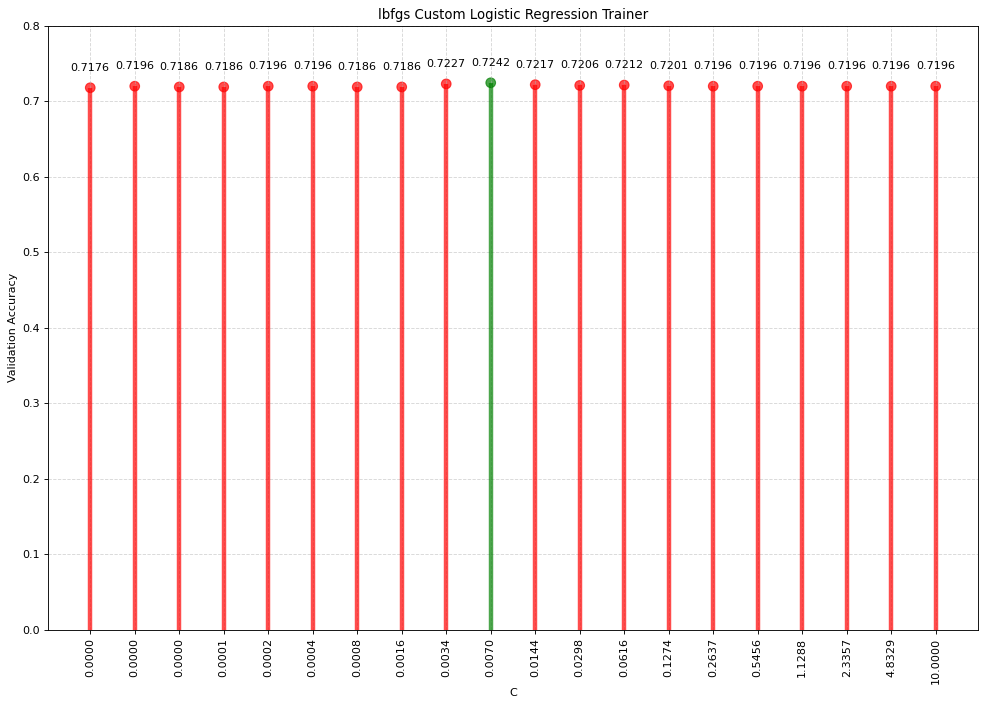

CPU times: user 1.14 s, sys: 44.8 ms, total: 1.19 s
Wall time: 1.22 s


In [17]:
%%time
lbfgs_sk2= SK_LogisticRegression(max_iter=109) 
CustomTrainer(lbfgs_sk2)

In [18]:
%%time
lbfgs_custom = Custom_LogisticRegression(eta=1,max_iter=1)
lbfgs_custom.fit(X_train, y_train)
yhats = lbfgs_custom.predict(X_test)
print('Accuracy of:',accuracy_score(y_test,yhats))

Accuracy of: 0.7176113360323887
CPU times: user 15.8 ms, sys: 3.06 ms, total: 18.9 ms
Wall time: 14.6 ms


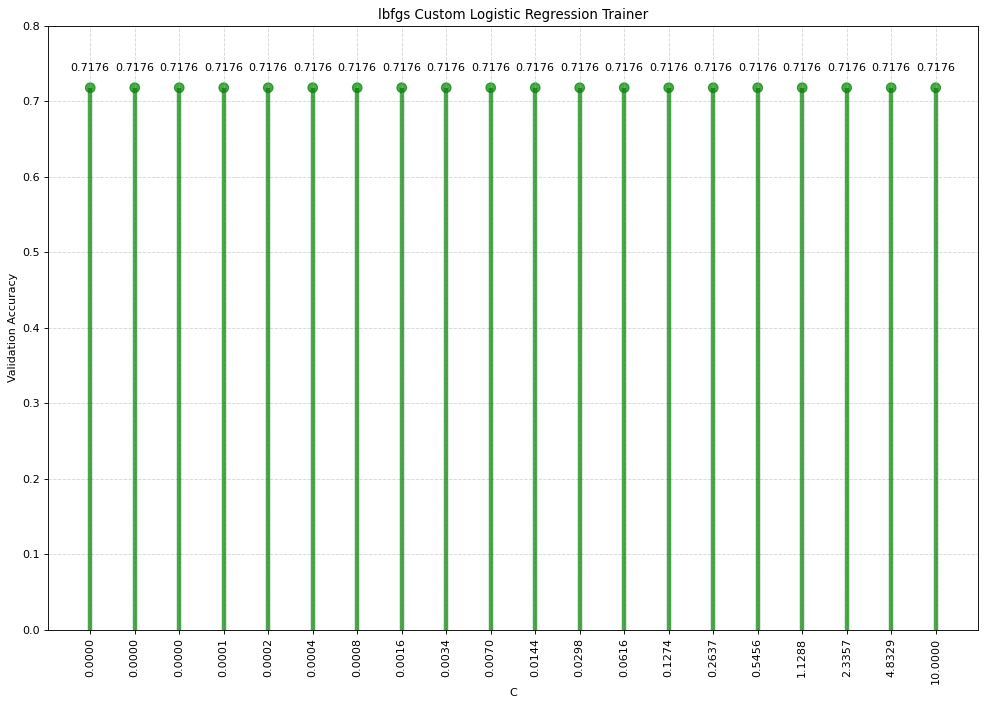

CPU times: user 1.41 s, sys: 102 ms, total: 1.51 s
Wall time: 727 ms


In [19]:
%%time
lbfgs_custom2 = Custom_LogisticRegression(eta=1, max_iter=1)
CustomTrainer(lbfgs_custom2)


As you can see from the results above, our the Scikit learn is **MUCH** more faster than the custom LM-BFGS implementation created earlier. I decided to use the same parameters for both functions just so the comparison fair and neither has a disadvantage. But as shown above, the Scikit learn implemenation takes nearly $\frac{1}{3}$rd of the time ours implementation took.  



------------------------

## 3. Deployment

In regards to which logistic regression implementation would third parties prefer? With the parameters in both implemenations being identical and the results being significantly different, third parties would much rather prefer using the scikit learn implementation. I completely advise for this to be done, aside from it running much faster than the custom implementation of LM-BFGS, the validation percentage is the exact same. Also looking at the generated lolipop plots, noticed how for the custom implementation only 1 iteration was made, while for the Scikit-learn implementation it was iterated over 100 times, and it still managed to perform at a manageble time, although time itself isn't much a factor for third parties interested.


---------------------

#### References


Kaggle. League of Legends Diamond Ranked Games (First 10 Minutes).
https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min (Accessed 3-9-2021)

Scikit-learn. Cross-validation. https://scikit-learn.org/stable/modules/cross_validation.html (Accessed 3-9-2021)
